In [175]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
#loading dataset
data = pd.read_csv("C:\\Users\\mtkan\\Downloads\\iris.csv")

In [177]:
#visualize the first four rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [178]:
#stats about the dataset 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [179]:
#basic info about the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [180]:
#counting samples on each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [181]:
#Dataset preprocessing
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [182]:
#scatter plot according to sepal length and width
import plotly.express as px
fig = px.scatter(data, x="SepalWidthCm", y="SepalLengthCm", color="Species")
fig.show()

In [183]:
#scatter plot according to petal length and width
fig = px.scatter(data, x="PetalWidthCm", y="PetalLengthCm", color="Species")
fig.show()

In [184]:
data.corr()

C:\Users\mtkan\AppData\Local\Temp\ipykernel_13228\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


C:\Users\mtkan\AppData\Local\Temp\ipykernel_13228\353084838.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation On iris Classes')

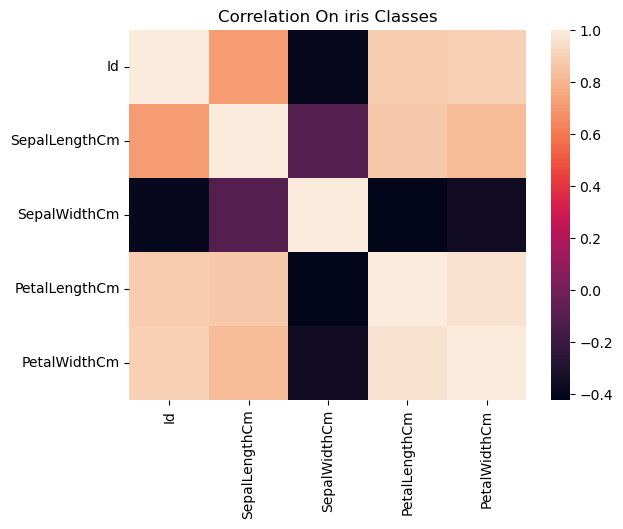

In [185]:
#correlation between columns
plt.figure(1)
sns.heatmap(data.corr())
plt.title('Correlation On iris Classes')

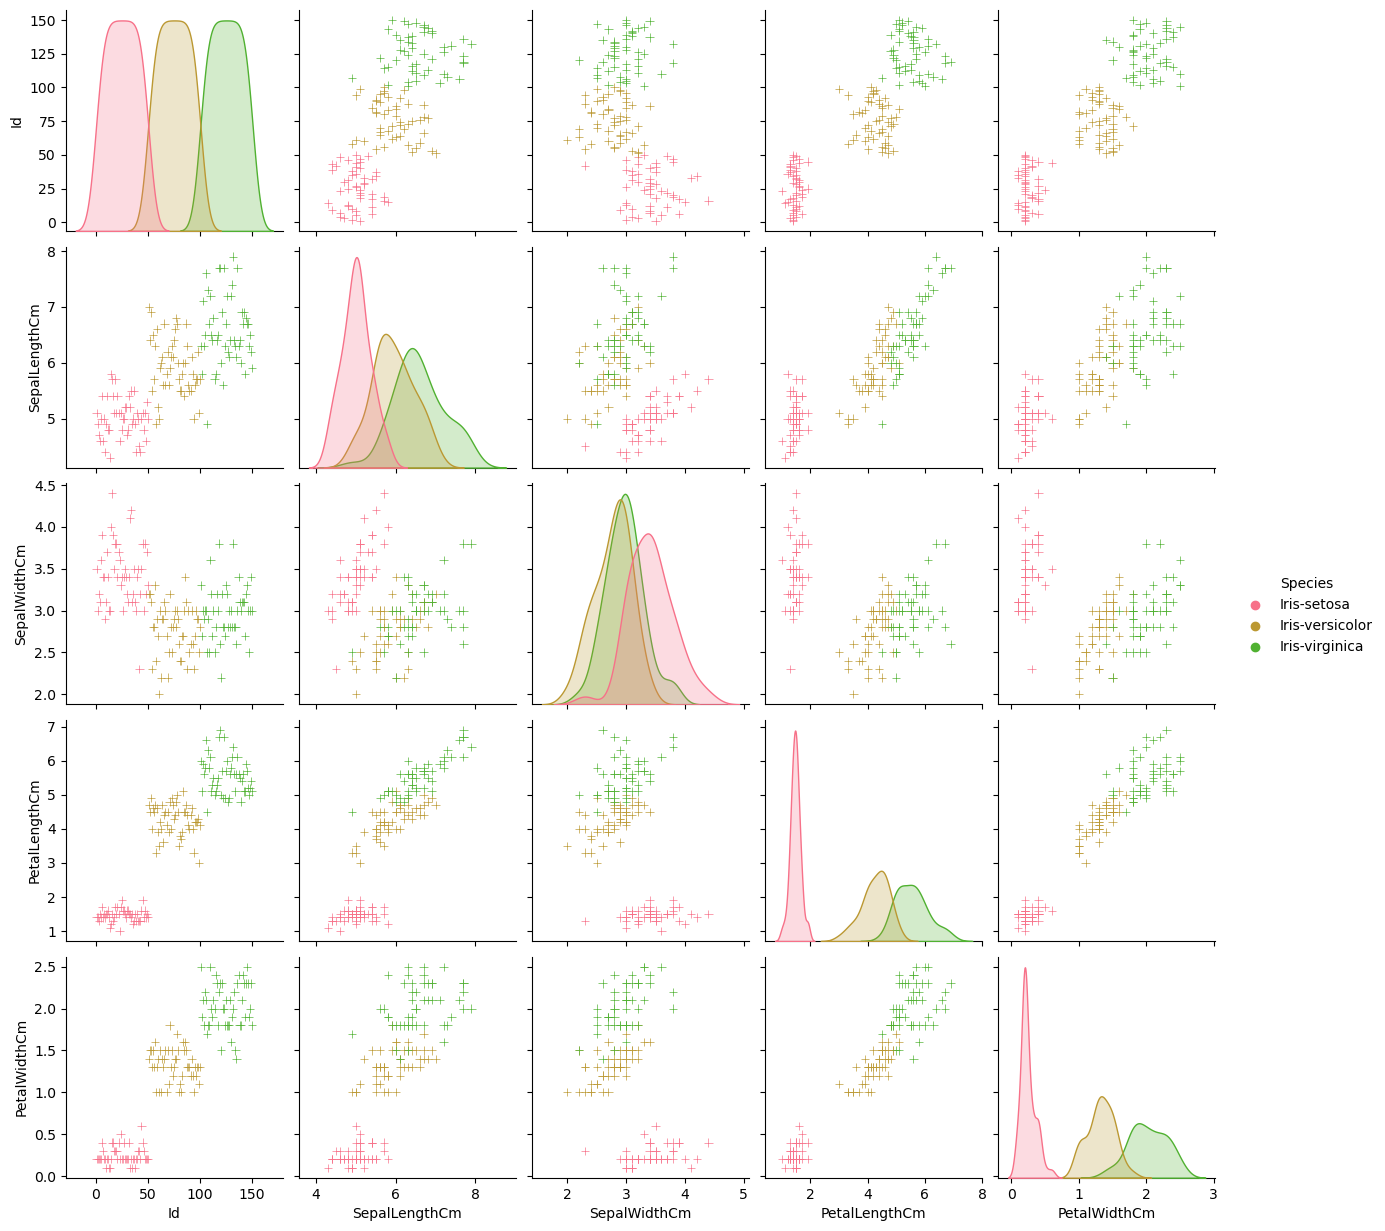

In [186]:
sns.pairplot(data, hue='Species',markers='+')

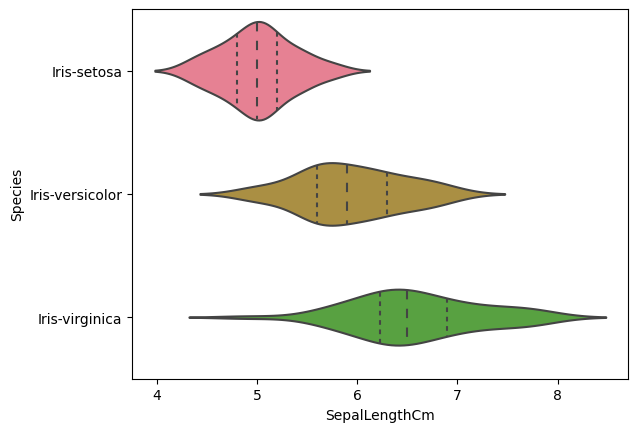

In [187]:
#Plotting the violin plot to check the comparison of a variable distribution
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()


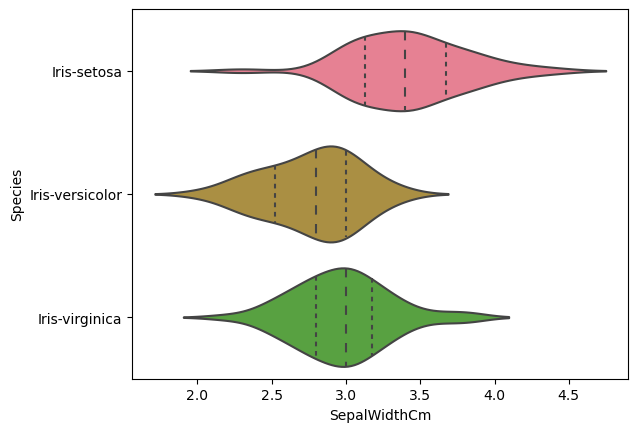

In [188]:
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()


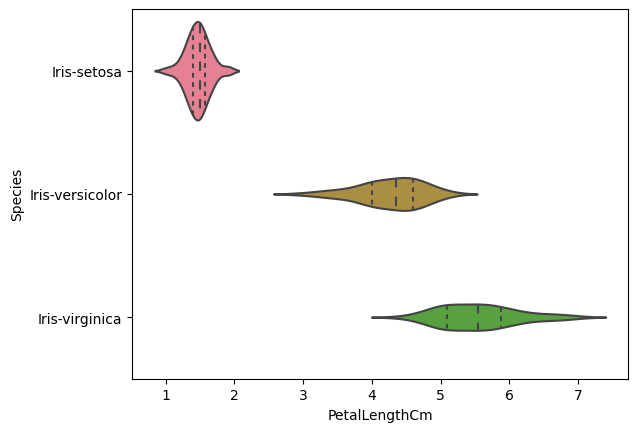

In [189]:
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()


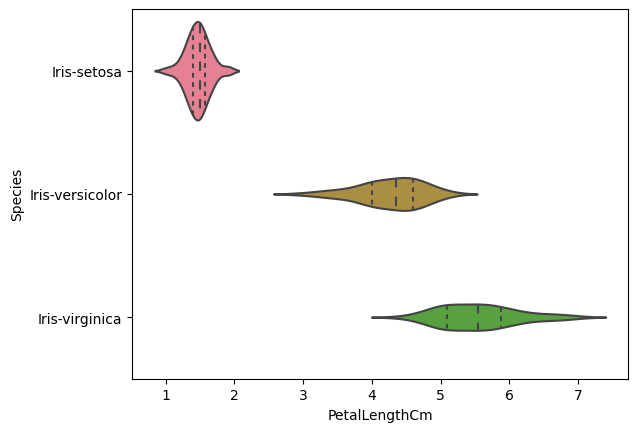

In [190]:
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()


In [191]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']

In [192]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=50)

In [193]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(xtrain,ytrain)    

DecisionTreeClassifier()

In [194]:
# predicting on the testing data.
ypred=dc.predict(xtest)
ypred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [195]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [196]:
#accuracy
accuracy_score(ytest,ypred)

0.9666666666666667

In [197]:
#classified data

print("Classification Report is:\n")
print(classification_report(ytest,ypred))

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [198]:
print("Confusion Matrix is:\n")
print(confusion_matrix(ytest,ypred))

Confusion Matrix is:

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [199]:
# Now it's time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(xtrain, ytrain)

SVC(C=1)

In [201]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred=model.predict(xtest)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(ytest, pred))

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



Accuracy score is:  0.9333333333333333


In [204]:
comparison = pd.DataFrame({
    'Model': ['Support Vector Machines','Decision Tree'],
    'Score': [0.933,0.966]})
com = comparison.sort_values(by='Score', ascending=False)
com= com.set_index('Score')
com.head(9)

,Model
Score,
0.966,Decision Tree
0.933,Support Vector Machines
